# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [38]:
# initial imports
from __future__ import print_function

import os
import numpy as np
import pandas as pd
import panel as pn
from panel.interact import interact, interactive, fixed, interact_manual
from panel import widgets
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv
import ipywidgets
from ipywidgets import interactive
from ipywidgets import FloatSlider
from IPython.display import display
from ipywidgets import interact

%matplotlib inline

In [39]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

## Load Data

In [40]:
# Read the census data into a Pandas DataFrame
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, parse_dates=True, infer_datetime_format=True)
sfo_data.head(20)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [41]:
sfo_data_housing = (
    sfo_data[["year", "housing_units", "sale_price_sqr_foot", "gross_rent"]]
    .groupby("year")
    .mean()
    .sort_values("housing_units")
    .reset_index()
)
sfo_data_housing

,year,housing_units,sale_price_sqr_foot,gross_rent
0,2010,372560,369.344353,1239
1,2011,374507,341.903429,1530
2,2012,376454,399.389968,2324
3,2013,378401,483.600304,2971
4,2014,380348,556.277273,3528
5,2015,382295,632.540352,3739
6,2016,384242,697.643709,4390


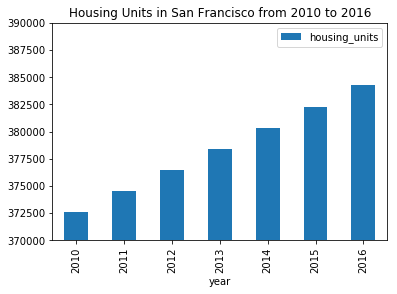

In [43]:
sfo_data_units_plot = sfo_data_housing.plot(kind="bar", x="year", y="housing_units", title="Housing Units in San Francisco from 2010 to 2016")
sfo_data_units_plot.set_ylim([370000, 390000])
sfo_data_units_plot

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [44]:
# Calculate the average gross rent and average sale price per square foot
sfo_data_avg_rent_sqft = (
    sfo_data_housing[["year", "sale_price_sqr_foot", "gross_rent"]]
    .groupby("year")
    .mean()
    .sort_values("gross_rent")
    .reset_index()
)
sfo_data_avg_rent_sqft.head(20)

,year,sale_price_sqr_foot,gross_rent
0,2010,369.344353,1239
1,2011,341.903429,1530
2,2012,399.389968,2324
3,2013,483.600304,2971
4,2014,556.277273,3528
5,2015,632.540352,3739
6,2016,697.643709,4390


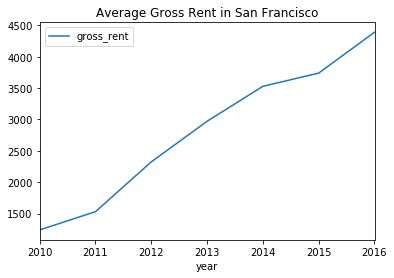

In [35]:
# Plot the Average Gross Rent per Year as a Line Chart 
sfo_data_avg_gross_plot = sfo_data_avg_rent_sqft.plot(kind="line", y="gross_rent", x="year", title="Average Gross Rent in San Francisco")
sfo_data_avg_gross_plot

### Average Sales Price per Year

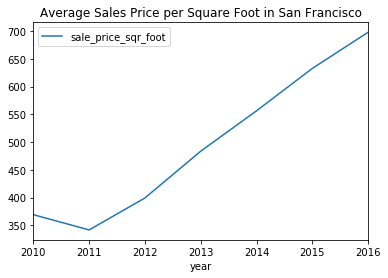

In [45]:
# Plot the Average Sales Price per Year as a line chart
sfo_data_avg_sales_plot = sfo_data_avg_rent_sqft.plot(kind="line", x="year", y="sale_price_sqr_foot", title="Average Sales Price per Square Foot in San Francisco")
sfo_data_avg_sales_plot

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [46]:
# ---------------------------------------------------------------------------
# Here I use the orignal PDF to build hvplot because it looks better in the graph
sfo_data["sale_price_sqr_foot"].mean()
sfo_data.dropna().drop_duplicates()

hood_widget = ipywidgets.Dropdown(options=sfo_data.neighborhood.unique().tolist(),
                                   value = 'Outer Mission',
                                   description='Community:')
def choose_com(neighborhood):
    hood_plot = sfo_data[sfo_data.neighborhood == neighborhood].hvplot(x='year', xlabel='Year', y='sale_price_sqr_foot', ylabel='Price/Sqft', title=f'{neighborhood}')
    display(hood_plot)

ipywidgets.interact(choose_com, neighborhood=hood_widget)

interactive(children=(Dropdown(description='Community:', index=65, options=('Alamo Square', 'Anza Vista', 'Bay…

<function __main__.choose_com(neighborhood)>

In [51]:
# Here I use groupby function as an attribute of hvplot on the orignal PDF
sfo_data.hvplot(x='year', xlabel='Year', y='sale_price_sqr_foot', ylabel='Price/Sqft', groupby='neighborhood', kind='line')

Traceback (most recent call last):
 File "C:\Users\lchri\anaconda3\envs\dev\lib\site-packages\pyviz_comms\__init__.py", line 316, in _handle_msg
 self._on_msg(msg)
 File "C:\Users\lchri\anaconda3\envs\dev\lib\site-packages\panel\viewable.py", line 242, in _on_msg
 patch.apply_to_document(doc, comm.id)
 File "C:\Users\lchri\anaconda3\envs\dev\lib\site-packages\bokeh\protocol\messages\patch_doc.py", line 100, in apply_to_document
 doc._with_self_as_curdoc(lambda: doc.apply_json_patch(self.content, setter))
 File "C:\Users\lchri\anaconda3\envs\dev\lib\site-packages\bokeh\document\document.py", line 1150, in _with_self_as_curdoc
 return f()
 File "C:\Users\lchri\anaconda3\envs\dev\lib\site-packages\bokeh\protocol\messages\patch_doc.py", line 100, in <lambda>
 doc._with_self_as_curdoc(lambda: doc.apply_json_patch(self.content, setter))
 File "C:\Users\lchri\anaconda3\envs\dev\lib\site-packages\bokeh\document\document.py", line 398, in apply_json_patch
 self._trigger_on_message(event_json["msg_type"], event_json["msg_data"])
 File "C:\Users\lchri\anaconda3\envs\dev\lib\site-packages\bokeh\document\document.py", line 687, in _trigger_on_message
 cb(msg_data)
 File "C:\Users\lchri\anaconda3\envs\dev\lib\site-packages\bokeh\document\document.py", line 348, in apply_json_event
 event = Event.decode_json(json)
 File "C:\Users\lchri\anaconda3\envs\dev\lib\site-packages\bokeh\events.py", line 167, in decode_json
 raise ValueError("Could not find appropriate Event class for event_name: %r" % event_name)
ValueError: Could not find appropriate Event class for event_name: 'document_ready'

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [52]:
# Define function to create plot
def plot_housing_tx(number_of_sales):
    housing_transactions = pd.DataFrame(
        {
            "years": np.random.randint(2010, 2019, number_of_sales),
            "sales": np.random.randint(53, 500, number_of_sales),
            "foreclosures": np.random.randint(10, 147, number_of_sales),
        }
    ).sort_values(["years", "sales"])

    return housing_transactions.hvplot.scatter(
        x="sales",
        y="foreclosures",
        c="years",
        colormap="viridis",
        title="Alleghany, PA Housing Transactions",
    )
interact(plot_housing_tx, number_of_sales=100)

interactive(children=(IntSlider(value=100, description='number_of_sales', max=300, min=-100), Output()), _dom_…

<function __main__.plot_housing_tx(number_of_sales)>

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [53]:
# Getting the data from the top 10 expensive neighborhoods
# Plotting the data from the top 10 expensive neighborhoods
sfo_hood_data = (
    sfo_data[["year", "neighborhood", "housing_units", "sale_price_sqr_foot", "gross_rent"]]
    .groupby(["year","neighborhood"])
    .mean()
    .sort_values("sale_price_sqr_foot", ascending=False)
    .reset_index('neighborhood')
)
sfo_t10hood_filter = sfo_hood_data.loc[sfo_hood_data['sale_price_sqr_foot'] >= 1050]
sfo_t10hood_filter.hvplot.bar(x="neighborhood", y="sale_price_sqr_foot", xlabel="neighborhood", ylabel="Price/Sqft", rot=90)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

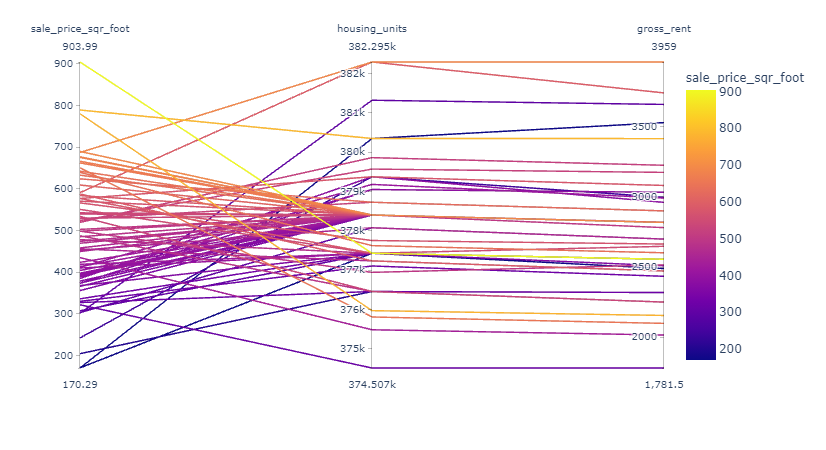

In [54]:
# Parallel Coordinates Plot
sfo_data_par = sfo_data[["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"]].groupby(["neighborhood"]).mean().reset_index()
sfo_data
px.parallel_coordinates(sfo_data_par, color='sale_price_sqr_foot')

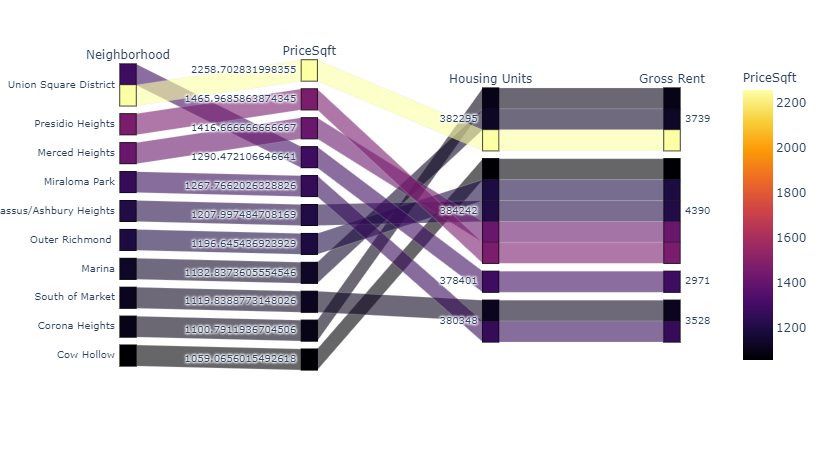

In [55]:
# Parallel Categories Plot
px.parallel_categories(
    sfo_t10hood_filter,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "Neighborhood",
        "sale_price_sqr_foot": "PriceSqft",
        "housing_units": "Housing Units",
        "gross_rent": "Gross Rent"
    },
)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [56]:
# Load neighborhoods coordinates data
file_path = Path("neighborhoods_coordinates.csv")
sfo_data_cord = pd.read_csv(file_path, parse_dates=True, infer_datetime_format=True)
# sfo_data_cord.head()
sfo_data_cord.rename(columns={"Neighborhood": "neighborhood"}, inplace=True)
sfo_data_cord = sfo_data_cord[["neighborhood", "Lat", "Lon"]].set_index("neighborhood")
sfo_data_cord.dropna().drop_duplicates()
sfo_data_cord.head()

,Lat,Lon
neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050


# Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [57]:
# Calculate the mean values for each neighborhood
# sfo_data_sqftmean = sfo_data["sale_price_sqr_foot"].mean()
sfo_data_mean = sfo_data[["neighborhood", "sale_price_sqr_foot"]].groupby(["neighborhood"]).mean().reset_index()
sfo_data_mean = sfo_data_mean[["neighborhood", "sale_price_sqr_foot"]].set_index("neighborhood")
sfo_data_mean.dropna().drop_duplicates()
sfo_data_mean.head()

,sale_price_sqr_foot
neighborhood,
Alamo Square,366.020712
Anza Vista,373.382198
Bayview,204.588623
Bayview Heights,590.792839
Bernal Heights,576.746488


In [58]:
# Join the average values with the neighborhood locations
hood_scatplot = (
    pd.concat([sfo_data_cord, sfo_data_mean], axis=1).dropna()
)
hood_scatplot.index.names = ['neighborhood']
hood_scatplot = hood_scatplot.reset_index()
hood_scatplot.head()

C:\Users\lchri\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,neighborhood,Lat,Lon,sale_price_sqr_foot
0,Alamo Square,37.791012,-122.402100,366.020712
1,Anza Vista,37.779598,-122.443451,373.382198
2,Bayview,37.734670,-122.401060,204.588623
3,Bayview Heights,37.728740,-122.410980,590.792839
4,Buena Vista Park,37.768160,-122.439330,452.680591


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

In [59]:
# Create a scatter mapbox to analyze neighborhood info
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

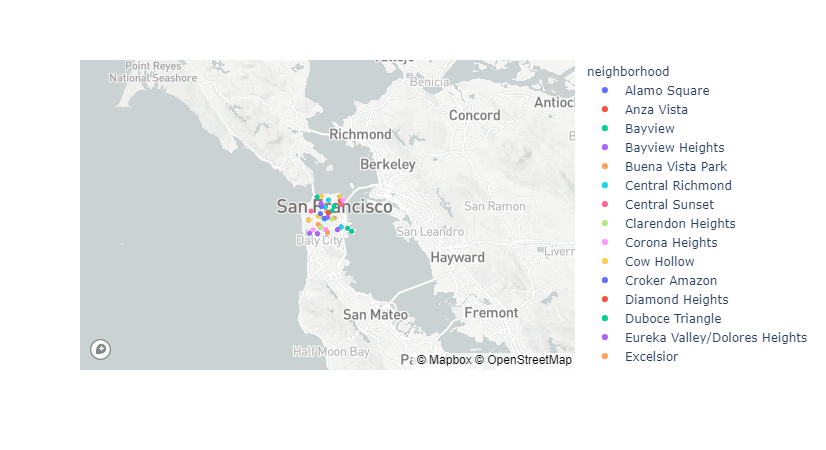

In [60]:
route_1 = px.scatter_mapbox(hood_scatplot, lat="Lat", lon="Lon", color="neighborhood")
route_1.show()